In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
%matplotlib inline

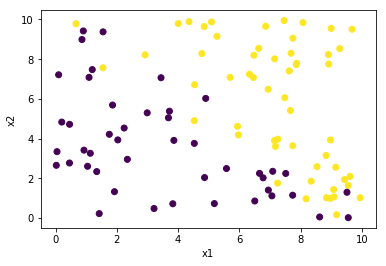

In [2]:
df = pd.read_csv('data_classification.csv')   # reading data

x1 = df['no of hours studied'].values         
x2 = df['no of hours slept'].values
y = df['pass'].values

# data visualization
plt.scatter(x1, x2, c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
class Logistic_reg():
    def __init__(self, epoch=5000, learning_rate=0.1):
        self.epoch = epoch                           # maximum iterations
        self.learning_rate = learning_rate           # learning rate
        self.bias = 1
        self.theta1 = self.theta2 = random.random()  # initializing parameters
        self.tolerance = 0.0009                      # change in error
        self.iteration = 0
        self.loss = []
        self.params = {'b': [], 'w1': [], 'w2': [], 'loss': []}
        
    def sigmoid(self, x):                            # activation function
        return 1 / (1 + np.exp(-x))

    def fit(self, x, y):
        m = len(x[0])                                # number of examples
        for i in range(self.epoch):
            init_bias = self.bias
            init_theta1 = self.theta1
            init_theta2 = self.theta2
            
            # prediction
            y_hat = self.sigmoid(self.bias + self.theta1*x[0] + self.theta2*x[1])
            
            # cost function (cross entropy)
            cost = - np.sum((y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) / m
            
            # cost gradient
            dcost = - (y/y_hat - (1-y)/(1-y_hat)) * y_hat*(1-y_hat)
            
            self.loss.append(cost)

            # updating parameters
            self.bias = self.bias - self.learning_rate*np.sum(dcost)/m
            self.theta1 = self.theta1 - self.learning_rate*np.sum(np.dot(dcost,x[0]))/m
            self.theta2 = self.theta2 - self.learning_rate*np.sum(np.dot(dcost,x[1]))/m
            
            # saving parameters
            self.params['b'].append(self.bias)
            self.params['w1'].append(self.theta1)
            self.params['w2'].append(self.theta2)
            self.params['loss'].append(np.sum(cost))
            
            self.iteration = i
            
            # getting change in parameter value
            change = abs(init_bias-self.bias) + abs(init_theta1-self.theta1) + abs(init_theta2-self.theta2)
            if(change < self.tolerance):
                break
                
    def predict(self, x):
        return self.sigmoid(self.bias + self.theta1*x[0] + self.theta2*x[1])

In [4]:
model = Logistic_reg()               # initializing model
model.fit([x1,x2], y)                # training
prediction = model.predict([x1,x2])  # prediction
print('Iterations to converge:', model.iteration)

Iterations to converge: 4451


<IPython.core.display.Javascript object>


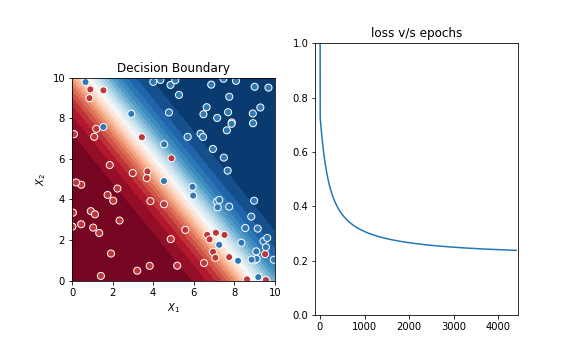

<IPython.core.display.Javascript object>


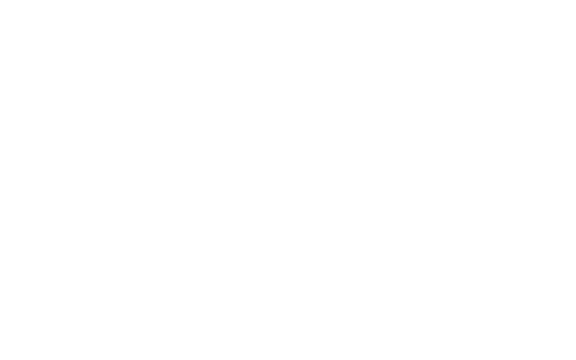

In [7]:
# Live Plotting

%matplotlib notebook

plt.ion()

fig = plt.figure(figsize=(8, 5))
fig.show()
fig.canvas.draw()

xx, yy = np.mgrid[0:10:.01, 0:10:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

ax = fig.axes.copy()
ax = fig.add_subplot(121)
ax1  = fig.add_subplot(122)

for i in range(0, len(model.params['w1']), 100):

    ax.clear()
    ax1.clear()
    
    probs = model.sigmoid(model.params['w1'][i]*grid[:,0] + model.params['w2'][i]*grid[:,1] + model.params['b'][i])
    contour = ax.contourf(xx, yy, probs.reshape((1000,1000)), 25, cmap="RdBu", vmin=0, vmax=1)

    ax.scatter(x1, x2, c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)

    ax.set(aspect="equal", xlim=(0, 10), ylim=(0, 10), xlabel="$X_1$", ylabel="$X_2$")
    ax.set_title('Decision Boundary')
    ax1.plot(model.loss[:i])
    
    ax1.axis([-100,model.iteration,0,1])
    ax1.set_title('loss v/s epochs')
   
    fig.canvas.draw()

Equation = -9.424996 + x1 * 1.047129 + x2 * 0.852954
Iterations to converge:  4451


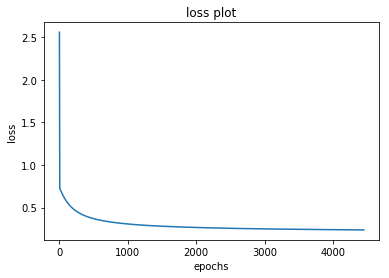

In [8]:
# loss
%matplotlib inline

print("Equation = %f + x1 * %f + x2 * %f" % (model.bias, model.theta1, model.theta2))
print("Iterations to converge: ", model.iteration)

plt.plot([i for i in range(model.iteration+1)], model.params['loss'])
plt.title("loss plot")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

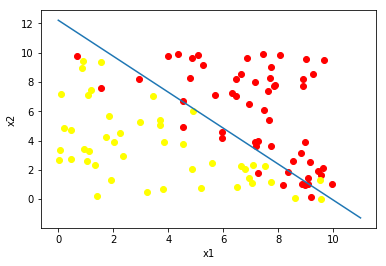

In [9]:
# visualization
for i in range (y.shape[0]):
    if y[i]==1:
        plt.scatter(x1[i], x2[i], color='red')
    else:
        plt.scatter(x1[i], x2[i], color='yellow')
        
x_vals = np.arange(12)
y_vals = (1 - model.bias - (model.theta1)*x_vals)/model.theta2
plt.plot(x_vals, y_vals, '-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# SkLearn Implementation

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model_sk = LogisticRegression()
model_sk.fit(np.array([x1,x2]).T, y)
prediction_sk = model_sk.predict(np.array([x1,x2]).T)

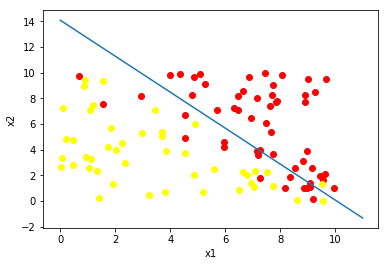

In [12]:
# visualization
for i in range (y.shape[0]):
    if y[i]==1:
        plt.scatter(x1[i], x2[i], color='red')
    else:
        plt.scatter(x1[i], x2[i], color='yellow')
        
x_vals = np.arange(12)
y_vals = (1 - model_sk.intercept_ - (model_sk.coef_[0][0])*x_vals)/model_sk.coef_[0][1]
plt.plot(x_vals, y_vals, '-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()